# Beamforming and FFT

This document is presented as an [IPython notebook](https://ipython.org/notebook.html). 
More information is available [here](https://www.continuum.io/downloads).

Prakash has prepared a [video](https://www.youtube.com/watch?v=DVi1TC24_BY) demonstrating how to setup Anaconda package for Python on your computer. 

> FFT is very fast way of computing inner products involving complex exponentials.

In [89]:
from IPython.display import YouTubeVideo
YouTubeVideo('DVi1TC24_BY')

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fftpack import fft, fftshift, ifft
from numpy.random import randn
%matplotlib notebook

In [66]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [60]:
def steering_vector(N, u, beta):
    n = np.arange(0, N)
    sv = np.exp(-1j*2*np.pi*beta*u*n)
    return sv    

In [61]:
N = 11
sv = steering_vector(N, np.array(0), 0.5)
Nfft = 1024

**Direct implementation**

In [93]:
uscan = np.linspace(-1, 1, Nfft)
V = np.empty((11, Nfft), dtype=complex)
idx = 0
for u in uscan:
    V[:, idx] = steering_vector(11, u, 0.5)
    idx = idx + 1

BP = np.dot(sv/N, V)

**FFT based implementation**

In [94]:
u = np.linspace(-(Nfft-1)/2, Nfft/2, Nfft)*2/Nfft
BP_fft = (1/N)*fftshift(fft(sv, Nfft))

<IPython.core.display.Javascript object>


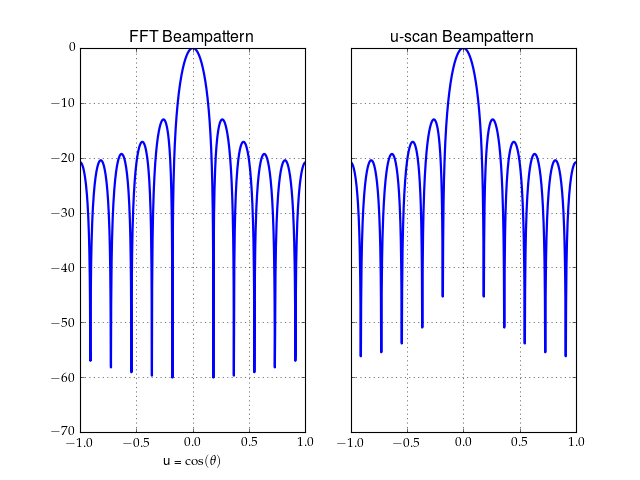

In [95]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(u, 20*np.log10(np.abs(BP_fft)), lw=2)
ax1.set_title('FFT Beampattern')
ax2.plot(uscan, 20*np.log10(np.abs(BP)), lw=2)
ax2.set_title('u-scan Beampattern')     
ax1.set_xlabel(r'u = \cos(\theta)')
ax1.grid(True)
ax2.grid(True)

<IPython.core.display.Javascript object>


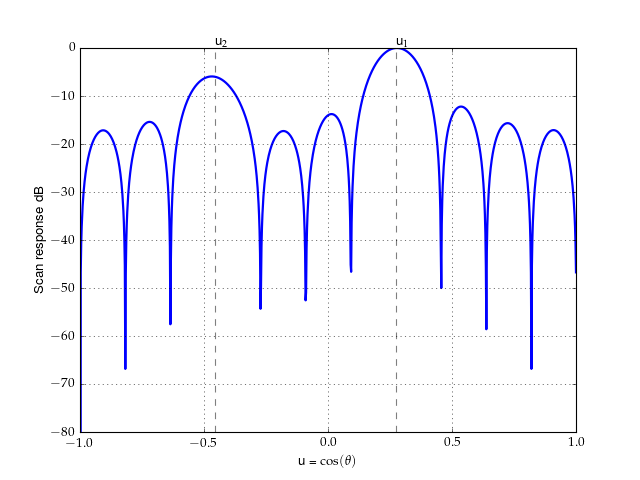

In [88]:
u1 = 3/11
u2 = -5/11
sv1 = steering_vector(N, u1, 0.5)
sv2 = steering_vector(N, u2, 0.5)
x = sv1 + 0.5*sv2
X = (Nfft/N)*fftshift(ifft(x, Nfft))

plt.figure()
plt.plot(u, 20*np.log10(np.abs(X)), lw=2)
plt.ylim((-80, 0))
plt.axvline(x=u1, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=u2, color='k', linestyle='--', alpha=0.5)
plt.grid(True)
plt.xlabel(r'u = \cos( \theta )')
plt.ylabel('Scan response dB')
plt.annotate('u_1', xy=(u1, 0), xytext=(u1, 0.2))
plt.annotate('u_2', xy=(u2, 0), xytext=(u2, 0.2))
plt.savefig(filename='two_source_response.pdf', dpi=120)

## DFT
Discrete time signal
DTFT: $X(e^{j\omega}) = \sum\limits_{m=0}^{M-1} x[n] e^{-jm\omega}$

Finite length $x[m] \quad\text{for}\quad 0\leq m \leq M-1$

finite length signals = finite aperture 

DFT : Frequency domain sampling of DTFT ever $\Delta\omega = 2/N$ and need $N \geq M$ to avoid aliasing in time.

$$ X[l] = X(e^{j\omega})|_{\omega = 2\pi l/N} $$

$$X[l] = \sum\limits_{n=0}^{N-1} x[n] e^{-j(2\pi/N)ln} \quad l = 0,\ldots, N-1$$

Computation requries $\mathcal{O}(N^2)$

FFT does it in $\mathcal{O}(N\log_2 N)$, based on divide-and-conquer approach




### Time domain
DTFT :

Frequency response: $H(e^{j\omega}) = \sum\limits_{m=0}^{M-1}h[m]e^{-j\omega m}$

$X_N[l] = DFT(x[m])$

## Spatial domain
* Finite set of narrowband array data $\mathbf{x}$
* uniform line array (ULA)
* $u = \cos(\theta)$
* $k = 2\pi/\lambda$
$$
\begin{align}
[\mathbf{v}(\theta)]_n  =& [e^{j(2\pi d/\lambda)n\sin(\theta)}] \\
 =& [e^{j(2\pi d/\lambda)nu}]
\end{align}
$$

**Scanned response**
$$y = \mathbf{w}^{H}(u)\mathbf{x}$$

$$\mathbf{w}(u) = \frac{1}{M}[e^{-jkdmu}]$$

$$y(u) = \frac{1}{N}\sum\limits x_m e^{jkdmu}$$

**Beampattern**
Gain for each plane wave from different direction
$$B(u) = \mathbf{w}^{H}\mathbf{v}(u), \quad \text{for} -1\leq u \leq 1$$
$$ B(u) = \sum w^* e^{-jkdmu}$$

$\omega = kdu$ and $\Delta\omega = kd\Delta u = 2\pi/N$

fft(conj(w), N)

If $d = \lambda/2$ so that $kd = \pi$ then $\Delta \omega = \pi \Delta u$

**Side note**
* Need to be careful when $d \neq \lambda/2$, the FFT output will have invisible areas too.
* scanned response can be implemented as IFFT
* Test with non-symmetric scenario
* FFT is memory efficient, 'in place' 
* Creating exponential vectors will be memory intensive